# Homework 4: More Simulation and the Central Limit Theorem 
***

**Name**: Isabella Schneider

***

This assignment is due on Moodle by **5pm on Friday March 16th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/dblarremore/csci3022/blob/master/resources/syllabus.md#collaboration-policy).

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [2]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import math
from matplotlib.pyplot import figure, show
%matplotlib inline


### [35 points] Problem 1 - Monte Carlo Estimation of Definite Integrals 
***

One really cool application of random variables is using them to approximate integrals/area under a curve.  This method of approximating integrals is used constantly in computational science to approximate really difficult integrals that we never want to do by hand.  In this exercise you'll figure out how we can do this in practice and test your method on a very simple integral. 

**Part A** Compute by-hand, the integral $f(x) = \sin(x)$ for $0 \leq x \leq \pi$.

We have:

$$
\int_0^{\pi} f(x) dx = \int_0^{\pi} sin(x) \\
= -cos(x) \Big|_0^{\pi}
= 1 + 1 \\
= 2
$$

**Part B**: Suppose we sample a random variable $X$ from $U(0,\pi)$ and another random variable $Y$ from $U(0,1)$ and think of them as $x$- and $y$-coordinates of a point in the box $[0,\pi] \times [0,1]$.  If we compute the ratio of points that fall under the curve $f(x)$ to the total points sampled, what does this value estimate? 

The value will compute the probability of falling under the curve if a random point is picked. We can use this ration to later compute the approximate area under the curve, but initially it is simply a probability.

**Part C**: How could we modify the process outlined in **Part B** so that our estimator estimates the value of the desired integral? 

We would go through the same process, but then, at the end, we would multiply the ration (or proportion) that we got in Part B by the area of the box we are sampling from. This is because what we calculated above is a proportion of the box, and to estimate the actual area, we would need to find what area of the box that proportion corresponds to.

**Part C** Write a function integrate that takes as arguments the number of points to sample and a boolean flag isPlot and approximates the definite integral of $f(x)$ from $0$ to $1$ by sampling $X$ from $U(0,\pi)$ and $Y$ from $U(0,1)$. Your function should perform 3 tasks: 

1. Return the estimate of the value of the integral. 
2. Return the sample variance of the random variable being simulated using the np.var function.  
4. If isPlot is True, plot the curve $f(x)$ as well as the location of the points $(X,Y)$, colored according to whether they fall above or below the curve. 

Run your simulation with isPlot=True for $1K$ samples so we can see your plot. Then, run your simulation (with the isPlot=False) with at least $10K$ samples and estimate the value of the given integral.  Does your estimate agree with the exact value of the integral you computed in **Part A**? 

The estimated area under the curve is 1.985
The estimate variance of the sample is 0.233


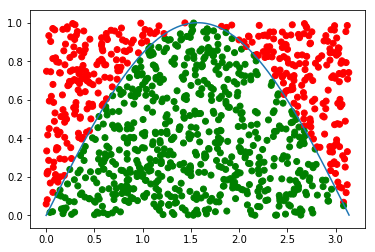

In [6]:
def integrate(num_samples=int(1e3), isPlot=False):
    # TO DO
    #sample x and y values in our square
    sample_x = np.random.uniform(0,math.pi,size=num_samples)
    sample_y = np.random.uniform(0,1,size=num_samples)
    curve = []
    under_curve = []
    #calculate the y values given the x values we sampled so we can compare our y samples
    for x in sample_x:
        curve.append(math.sin(x))
    #find if values are under the curve
    under_curve = sample_y < curve 
    #find how many are under the curve
    trues = np.count_nonzero(under_curve == True)
    #calculate the approximated area
    estimate = (trues/num_samples) * math.pi
    #find the variance of the points that fall under the curve using built-in function
    sample_var = np.var(under_curve) 
    if isPlot is True:
        #used to calculate values at points on the sin curve
        x = np.arange(0,math.pi,0.01)
        colors = np.array(['green' if b else 'red' for b in under_curve])
        #plots the scatter plot of the sampled points
        plt.scatter(sample_x, sample_y, c=colors)
        y = []
        #plots the sin curve
        for i in x:
            y.append(math.sin(i))
        plt.plot(x, y)
    return estimate, sample_var 
est, var = integrate(isPlot=True)
est, var = integrate(num_samples=int(1e4))
print("The estimated area under the curve is {:.3f}".format(est))
print("The estimate variance of the sample is {:.3f}".format(var))

The value for the estimate agrees with the integral. Depending on the trial, we get approxiamtely 2 with some fluctuation (this fluctuation decreases as the number of samples increases).

**Part D**: In the simulation above, what is distribution of the random variable we're actually sampling and what is/are its parameters?  

It is a Bernoulli distribution - we are either under or over the curve, which is a true/false situation. So we have the parameter of probability $p$. The probability $p$ is going to be the proportion of points under the curve compared to all of the points we sampled.

**Part E**: Compute the expected value of the random variable you described in **Part D** by hand.  Does this value agree with the exact value of the integral you computed in **Part A** and the estimated value you computed in **Part C**? 

The expected value of a Bernoulli distribution is $E[X]=p$. However, we have not actually calculated the probability $p$ yet, so we need to calculate that by hand. We have that the area under the curve is 2, and the area of the box we are sampling from is $\pi$. So the probability that we are under the curve is the area under the curve divided by the total area, or $\frac{2}{\pi}$. Therefore our excpected value is $\frac{2}{\pi}$.

This value does not match the actual value of the area under the curve, because expected value calculates the "average" value that we will get. Therefore, Part A and Part C will not match an expected value because we are calculating how the expected value relates to the area of the box. Since the expected value is a proportion, we must multiply by the area of the box, $\pi$, to get the area under the curve. In that sense, the expected value is what we would expect since $\pi \cdot \frac{2}{\pi}$ is 2. 

**Part F**: Compute the variance of the random variable you described in **Part D** by hand.  Does this value agree with the sample variance observed in **Part C**? 

The variance of a Bernoulli distribution is $Var[x]=p(1-p)$. We already caluclated $p$ to be $\frac{\pi}{2}$ above, so plugging in we get:

$$
Var[x] = \frac{\pi}{2} \cdot \Big(1-\frac{\pi}{2}\Big) \\
\approx 0.2313
$$

So our variance matches what we got in our simulation, which was approximately 0.2313.

### [25 points] Problem 2 - Sampling Freshies
***

Maureen Ferguson stands alone on the riverbank. Snow has come to Colorado and flakes collect on her majestic pelt and whiskers. She shivers them off not because she is cold but just because her otter reflexes have been honed by millenia of adaptation. She is a biological machine. An inspiration. 

She wanders into her otter-mansion, hungry. There are piles RiverSnax from the autumn harvest. These are no ordinary RiverSnax, of course. They must be inspected with statistical care so that they are with high probability of the finest quality. You see, Maureen's snax have a freshness score, measured in Freshies, named after Professor Charles Snaxavier Fraeshmann. The average RiverSnack from her current supplier is 91 Freshies, and the standard deviation is 6 Freshies. 

You are new on the job, excited to apply your CSCI 3022 knowledge, and keen to prove yourself in a big and changing world. You are in charge of sampling the RiverSnax. Your boss, Governor John Hickenlotter, tells you that you must take a sample of Snax and that the average freshness must be no less than 90 Freshies. If the average is below 90 Freshies, the whole pile of RiverSnax must be thrown away, rejected. The current system, when you arrive is to sample 30 snax from each pile to see if the average freshness is above the 90 Freshies threshold. 

**Part A**:  Say "Freshies Threshold" at least 10 times in a row, as quickly as possible. Do not show your work. 



In [7]:
for i in range(10):
    print("Freshies Threshold")
print("That was pretty fast if you ask me!")

Freshies Threshold
Freshies Threshold
Freshies Threshold
Freshies Threshold
Freshies Threshold
Freshies Threshold
Freshies Threshold
Freshies Threshold
Freshies Threshold
Freshies Threshold
That was pretty fast if you ask me!


**Part B**: What is the probability that a RiverSnack is rejected under the current system of 30 samples?

We can find this probability by performing a Box Muller transformation, so that we can calculate the area under the normal curve more easily. Since we are looking for rejection (i.e. average Fresshies below 90), we need to find the are from -$\infty$ up until 90 Freshies. We use the transformation:

$$
Z = \frac{\bar{x} - \mu}{\sqrt{\frac{\sigma^{2}}{n}}} \\
Z = \frac{90 - 91}{\sqrt{\frac{6^{2}}{30}}} \\
Z = -0.9129
$$

We plug $\Phi(-0.9129)$ into a calculator (either in Python or on the internet, or we can find the corresponding value in a lookup table) and get that $\Phi(-0.9129) \approx 0.1806$. So we have that there is an 18.06% chance that a pile of RiverSnax is rejected.

**Part C**: Well, that's not good enough. Not for our Maureen Ferguson. You propose to Governor Hickelotter that you will get RiverSnax from a new supplier. The new supplier's RiverSnax have a standard deviation of 6 Freshies, just like the old ones. But, they can harvest the RiverSnax from various parts of the river, to adjust the average Freshy level of the RiverSnax, $\mu$. Gov. Hickenlotter's requirement is that the probability that a pile of RiverSnax is rejected is less than 0.001. What is the minimum average Freshy level $\mu$ needed in order to achieve the Governor's requirement?


First, we find the value of Z that corresponds to 0.001 using either a some form of calculator or using a lookup table. We discover that for the area to be 0.001 under the normal curve, we are at $Z = -3.09$. Now we use this to solve for $\mu$ in the Box Muller transformation. We have:

$$
-3.09 = \frac{90-\mu}{\sqrt{\frac{6^2}{30}}} \\
-3.3849 = 90-\mu \\
\mu \approx 93.3894
$$

So the new supplier has an average Freshy level of 93.39.

**Part D**: You are about to submit your report, given your answer above, when you find out that the new supplier is going out of business. Ugh.  You are stuck with the old RiverSnax. But the Governor's requirement still stands: the probability that a pile of RiverSnax is rejected must be less than 0.001. You decide you'll just take more samples from the existing piles. Surely, the number must be greater than 30, but... what is the minimum number of samples that will ensure that each pile of RiverSnax is rejected with probability less than $0.001$?

For this part, now our $n$ value (or the sample size) is unknown in the Box Muller, so we need to solve for it. We still have that $Z = -3.09$ to get to the desired probability. So we have:

$$
-3.09 = \frac{90-91}{\sqrt{\frac{6^2}{n}}} \\
\frac{-18.54}{\sqrt{n}} = -1 \\
\sqrt{n} = 18.54 \\
n = 343.73
$$

So we conclude that the minimum number of samples required in order for a pile of RiverSnax to be rejected with a probability of less than 0.1% is 344 samples.

**[Extra Credt - 2 points] Part E**: Draw an ASCII picture of Maureen Ferguson. 

 


In [8]:
                                                                                                    
                                                                        .-::::/:://:.               
                                                                      `--.-/+/+//..-`.-.`           
                                                                   `::-`y+ -+/+/+`oo. ..-           
                                                                   `-`  .``/+//o/.``   `            
                                                                    .`     `/oo/`                   
                                                                    .    ` ``..````     `           
                                                                   .      ` `           `           
                                                                  `.     ``````````     ``          
                                                                  :                      `          
                                                                 .+`                     `          
                                                                `//-`                    `          
                                           `..--::::::---..```.:o///-                    .          
                                       `.:////::::::::::::::::+o/::/:`                   `          
                                     `/+/:::::::::::::::::::::/:::::/:                    `         
                                   `:+/:::::::::::::::::::::::::::::://                   `         
                                  -+/:::::::::::::::::::::::::::::::::+-                  `         
                                 :+::::::::::::::::::::::::::::::::::::/-                  `        
                                :+::::::::::::::::::::::::::::::::::::::/-                 .        
                               .o/:::::::::::::::::::::::::::::::::::::::/-                .        
                               +//::::::::::::::::::::::/::::::::::::::::::-               :        
                               o/::::::::::::::::::::://+++::::::::::::::::/              ..        
                               +/:::::::::::::::::::::::::/+++:::::::::::::/.            `.         
                               :::::::::::::::::::::::::::::+/+::::::::::::/.          `:.          
                              `/+:::::::::::::::::::::::::::/:-//::::::::::/        `.:o-           
                        ``.-:://o/::::::::::::::::::::::::::/   `-::::::::::    ``-/+++-            
              `````..-:://///::::::::::::::::::::::::::::::/`     .:::::::/-.://+++////             
        `.-:://///////:::://:::::::::::::::::::::::::::::/-         ./::::+  :+o+////+`             
   `.::///:////://://:::::::::::::::::://::::::::::::/+o/..--.`      .++//+--.``-+///++/++-`        
  /o+//:/::///::////:::::::::::::::::://+/::::::/+++++/::/+ooo+:-   //oo//++++/  -///+++o++/        
 `--::://////:::::::::::---------------. :::::-::::::::::::::://-   .:://:::::.   ::::::::`       
 
(credits to https://www.text-image.com/convert/ascii.html for making this drawing possible)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)

### [40 points] Problem 3 - Not-so-Easy Peasy Plinko 
***

[Plinko](http://priceisright.wikia.com/wiki/Plinko), the shining jewel of the gameshow [Price is Right](https://en.wikipedia.org/wiki/The_Price_Is_Right), is a staple of American culture.  Luckily for us, it's also chalk-full of interesting ideas from probability and statistics. The game involves dropping a disc onto an inclined board of pegs and letting it bounce around until it lands in a bin with an associated cash value. Players get to drop some number of discs down the Plinko board and keep their winnings.   

In class we looked at a simplified version of Plinko:  

![alt text](http://danlarremore.com/misc/plinko1.png)


In real life, Plinko has boundaries, positioned symmetrically around the center $c$ at positions $\ell$ and $r$ s.t. $|c-\ell| = |c+r|$. The effect of the boundaries are that when the Plinko disc hits the boundary, it can only move back toward the center. In other words, if the disc hits the boundary at $\ell$, it can only go right at that level. Likewise, if the disc hits the boundary at $r$, it can only go left at that level. 

For instance, the following board depicts a Plinko game with boundaries at $0.5$ (halfway between the centers of Buckets 0 and 1) and $5.5$ (halfway between Buckets 5 and 6)  The red pegs indicate boundary pegs on which the disc always moves toward the center.   

![alt text](http://danlarremore.com/misc/plinko2.png)


**Part A**: Write a simulator of Plinko that models the disc moving through each of the 6 rows of pegs to its final destination in one of the 7 bins. Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Run your simulation for at least $10K$ trials and plot a density histogram estimate of the PMF of $X$ when the probability of moving left or right when hitting a peg is equal to $p = 0.5$. 

Text(0.5,1,'Distribution of End Bins in Plinko')

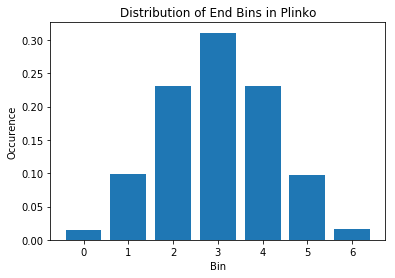

In [9]:
n = 10000
#taken from nb11 - no need to reinvent the wheel!
def plinko_trial():
    bucket = 0 
    for i in range(6):
        bucket += np.random.choice([0,1])
    return bucket

results = []
for i in range(n):
    results.append(plinko_trial())

#plot the results
counts = []
#find how many of each bin occur, and create occurences list with that info
for x in range(0,7):
    count = 0
    if x in results:
        count = results.count(x)
    #divided by n to get proportion rather than actual count
    counts.append(count/n)
#plots bin numbers with corresponding occurences
plt.bar([0,1,2,3,4,5,6], counts)
plt.xlabel("Bin")
plt.ylabel("Occurence")
plt.title("Distribution of End Bins in Plinko")

**Part B**: Let $X$ be the random variable corresponding to the Bucket that the disc lands in.  Write down the **true** PMF for $X$. (**Hint**: It might be helpful to reflect back on the discussion from Lecture 11). 

A given bin value $x$ can calculated using the Binomial distribution with (in this case) probability $p=\frac{1}{2}$ and total bins $n=6$ (we only need 6 because bin 0, which would be considered all "failures" in a binomail distribution, is considered, so we have 7 total bins labelled 0-6). We can represent this as a probability mass function like so:

$$
P(X=x) = f(x) = \binom{6}{x}\cdot \Big(\frac{1}{2}\Big)^{x} \cdot \Big(\frac{1}{2}\Big)^{6-x}
$$

So we have that:

$$
P(X=0) = 0.0156 \\
P(X=1) = 0.0938 \\
P(X=2) = 0.2344 \\
P(X=3) = 0.3125 \\
P(X=4) = 0.2344 \\
P(X=5) = 0.0938 \\
P(X=6) = 0.0156 \\
$$

**Part C**: Write a simulator for Plinko with boundaries. Your code should be similar to your code from **Part A**, but should take in two variable boundaries, left_bound and right_bound, corresponding to the location of the left boundary and right boundary, respectively. 


In [72]:
def plinko_trial_boundaries(left_bound, right_bound):
    bucket = 0 
    #get the value of the min/max bucket number the ball can go into
    left_cut = left_bound*2
    right_cut = (6-right_bound)*2
    right_bound = int(right_bound)
    left_bound = math.ceil(left_bound)
    for i in range(6):
        direction = ''
        val = np.random.choice([0,1])
        if val == 0:
            direction = 'left'
        else:
            direction = 'right'
        bucket += val
        #check to see if we have reached a boundary, and change the current bucket to reflect that
        #first check if we could be at a cutoff point, then see if the previous direction was left or right
        if (i >= (6-left_cut)) and (direction == 'left'):
            #then check is the bucket is less than our boundary, and also if we have passed the boundary
            if (bucket < left_bound) and (bucket < (i-left_bound-1)):
                bucket = bucket + 1
        if (i >= (6-right_cut)) and (direction == 'right'):
            #check if we have passed the boundary (easier to check than left)
            if bucket > right_bound:
                bucket = bucket - 1
                        
    return bucket

**Part D**: Consider the board with left_bound $= 0.5$ which looks as follows: 

![alt text](http://danlarremore.com/misc/plinko3.png)

Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Run your simulation for at least $10K$ trials and plot a density histogram estimate of the PMF of $X$. Compare the approximate PMF for this board to the no-boundary board from **Part A**. Explain the mechanism that causes the differences between the two PMFs in words. 




[0.0, 0.1106, 0.2396, 0.3107, 0.2317, 0.0933, 0.0141]


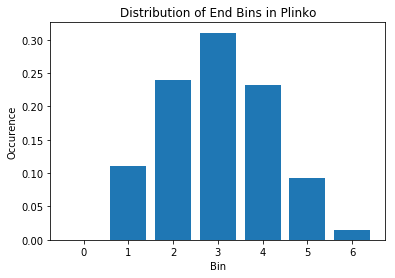

In [73]:
m = 10000
results1 = []
for i in range(m):
    results1.append(plinko_trial_boundaries(0.5, 10))

#plot the results
counts1 = []
#find how many of each bin occur, and create occurences list with that info
for x in range(0,7):
    count1 = 0
    if x in results:
        count = results1.count(x)
    #divided by n to get proportion rather than actual count
    counts1.append(count/m)
#plots bin numbers with corresponding occurences
plt.bar([0,1,2,3,4,5,6], counts1)
plt.xlabel("Bin")
plt.ylabel("Occurence")
plt.title("Distribution of End Bins in Plinko")
print(counts1)

What is happening when we add the boundary at 0.5 is that we are making the probability of going into the 0 bin 0%, and if we are at the point between bin 0 and 1, there is a 100% chance of going into bin 1. This essentially takes the probability of going into bin 0 and adds it to the probability of going into bin 1, raising bin 1's overall proportion by whatever bin 0 would have contributed. 

**Part E**: Now consider the board with left_bound $= 1.5$ which looks as follows: 

![alt text](http://danlarremore.com/misc/plinko4.png)

Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Run your simulation for at least $10K$ trials and plot a density histogram estimate of the PMF of $X$. Compare the approximate PMF for this board to the boards from **Parts A** and **D**. Explain the mechanism that causes the differences between the three PMFs in words. 


[0.0, 0.0, 0.3452, 0.3095, 0.2373, 0.0924, 0.0156]


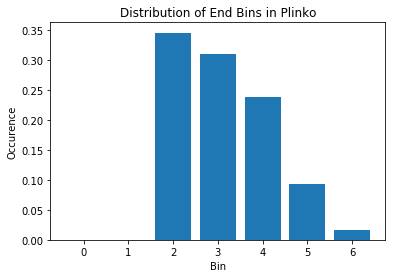

In [74]:
results1 = []
for i in range(m):
    results1.append(plinko_trial_boundaries(1.5, 10))

#plot the results
counts1 = []
#find how many of each bin occur, and create occurences list with that info
for x in range(0,7):
    count1 = 0
    if x in results:
        count = results1.count(x)
    #divided by n to get proportion rather than actual count
    counts1.append(count/m)
#plots bin numbers with corresponding occurences
plt.bar([0,1,2,3,4,5,6], counts1)
plt.xlabel("Bin")
plt.ylabel("Occurence")
plt.title("Distribution of End Bins in Plinko")
print(counts1)

Now what we are doing is guaranteeing that the ball can never go in bin 0 or bin 1. What is happening now is that the probabilities of going into bin 0 or 1 is being transferred to the probability of going into bin 2 or bin 3, because that is where the ball has to go if it "technically", under normal mechanisms without boundaries, ends up in bin 0 or 1. 

**Part F**: OK, one more. Consider the board with left_bound $= 1.5$ and right_bound $= 5.5$ which looks as follows: 

![alt text](http://danlarremore.com/misc/plinko5.png)

Let $X$ be the random variable corresponding to the Bucket that the disc lands in. Use your observations from **Parts A-D** to write down the **true** PMF of $X$. 




[0.0, 0.0, 0.3459, 0.3122, 0.2323, 0.1096, 0.0]


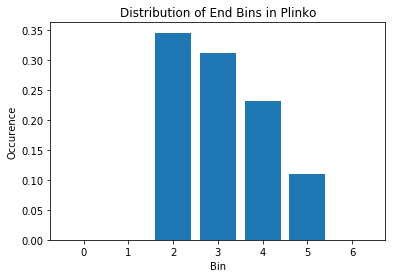

In [75]:
results1 = []
for i in range(m):
    results1.append(plinko_trial_boundaries(1.5, 5.5))

#plot the results
counts1 = []
#find how many of each bin occur, and create occurences list with that info
for x in range(0,7):
    count1 = 0
    if x in results:
        count = results1.count(x)
    #divided by n to get proportion rather than actual count
    counts1.append(count/m)
#plots bin numbers with corresponding occurences
plt.bar([0,1,2,3,4,5,6], counts1)
plt.xlabel("Bin")
plt.ylabel("Occurence")
plt.title("Distribution of End Bins in Plinko")
print(counts1)

We now have that the only bins that the ball can go into are 2, 3, 4, and 5. So we can calculate this distribution in a similar fashion, but the values that would have corresponded to the now unreachable bins goes to the bin that is reflected over the boundary and is still accessible. In the specific case above, we have:

$$
f(2) = P(X=2) + P(X=1) = 0.3282 \\
f(3) = P(X=3) + P(X=0) = 0.3282 \\
f(4) = P(X=4) = 0.2344 \\
f(5) = P(X=5) + P(X=6) = 0.1094 
$$

Note: As much as I tried to get my simulation to reflect results over the boundary axis, I could not get it to work. I tried keeping track of where the ball was based on the previous move and its bucket (since the bucket number corresponds to how many previous left/right moves happened, given the position on the board), but even doing this I was unable to demonstrate this relfective pattern that we would expect. 


**Part G**: Suppose I challenge you to a _friendly_ game of Plinko on the board from **Part F**. I offer to pay you a dollar amount equal to the bucket that your disc lands in, but also charge you a flat fee for each disc that you play.  How much should I charge you per disc so that we break even in the long run? 

We can calculate the expected value for the game using the formula: $\sum f(x) \cdot x$. Doing this, we have:

$$
2 \cdot f(2)+ 3 \cdot f(3)+4 \cdot f(4)+5 \cdot f(5) = 2 \cdot 0.3282 + 3 \cdot 0.3282 + 4 \cdot 0.2344 + 5 \cdot 0.1094\\ 
= 3.1256
$$

Since the expected value is \$3.13, the flat rate should be exactly that value, since as we play more and more rounds, the average winnings will be \$3.13. In order for you to not lose money, and in order for me to not lose money (in the long run), that amount should be charged.

### Challenge Fun Problem [0 points] - Real-Deal Plinko 
***

Implement a full-blown Plinko simulator based on the actual board from Price is Right, which allows you to choose where to place the disc at the top of the board.  

![alt text](https://i.pinimg.com/736x/7d/4b/5b/7d4b5b9ba5cdeceea16433eaadeeaf13--mash-game-plinko-game.jpg)

You can actually do this using mostly your code from **Problem 3** and some careful handling of the boundaries relative to where you drop the disc.  Investigate questions like "What is the optimal position to drop the disc to maximize expected winnings?" and "What are the expected winnings if you play Plinko optimally?"

Once you're done with that, it's time to go full-on Meta-Plinko.  Suppose the boundaries of the Plinko board are in their true positions from the real game show, but the board can have an arbitrary number of rows.  Is there a minimum number of rows the board can have at which point the PMF for the distribution becomes approximately uniform?  If not, is there a Bucket, or set of Buckets, that always have a greater chance of claiming the disc? 
